# Movie Recommendation System - Complete Hybrid Approach

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
# %% Load Data
print("Loading MovieLens 100K Dataset...")

# User data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('Dataset/u.user', sep='|', names=u_cols, encoding='latin-1')

# Movie data
i_cols = ['movie_id', 'movie_title', 'release date', 'video release date', 
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 
          "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
          'Thriller', 'War', 'Western']
movies = pd.read_csv('Dataset/u.item', sep='|', names=i_cols, encoding='latin-1')

# Ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('Dataset/u.data', sep='\t', names=r_cols, encoding='latin-1')

print(f"Users: {len(users)}")
print(f"Movies: {len(movies)}")
print(f"Ratings: {len(ratings)}")

Loading MovieLens 100K Dataset...
Users: 943
Movies: 1682
Ratings: 100000


In [5]:
# Rating distribution
print("\nRating Distribution:")
print(ratings['rating'].value_counts().sort_index())


Rating Distribution:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


In [6]:
# User rating counts
user_rating_counts = ratings.groupby('user_id').size()
print(f"\nAverage ratings per user: {user_rating_counts.mean():.2f}")
print(f"Median ratings per user: {user_rating_counts.median():.0f}")
print(f"Users with < 10 ratings: {(user_rating_counts < 10).sum()}")
print(f"Users with 10-30 ratings: {((user_rating_counts >= 10) & (user_rating_counts <= 30)).sum()}")
print(f"Users with > 30 ratings: {(user_rating_counts > 30).sum()}")


Average ratings per user: 106.04
Median ratings per user: 65
Users with < 10 ratings: 0
Users with 10-30 ratings: 213
Users with > 30 ratings: 730


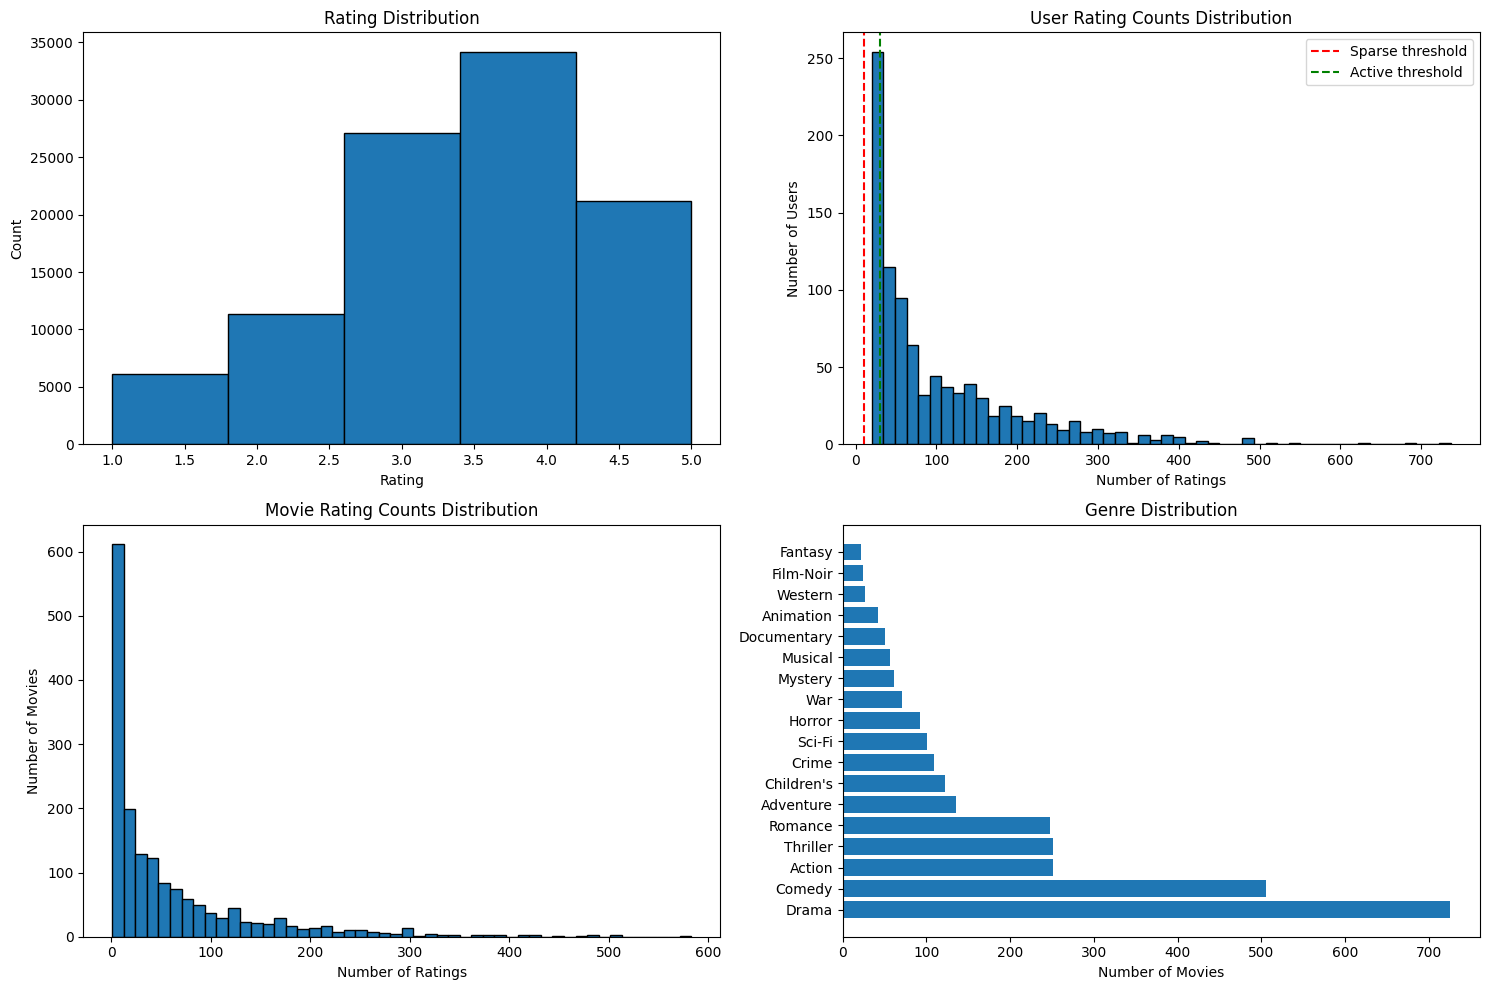

In [7]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rating distribution
axes[0, 0].hist(ratings['rating'], bins=5, edgecolor='black')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# User rating counts distribution
axes[0, 1].hist(user_rating_counts, bins=50, edgecolor='black')
axes[0, 1].set_title('User Rating Counts Distribution')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].axvline(10, color='r', linestyle='--', label='Sparse threshold')
axes[0, 1].axvline(30, color='g', linestyle='--', label='Active threshold')
axes[0, 1].legend()

# Movie rating counts
movie_rating_counts = ratings.groupby('movie_id').size()
axes[1, 0].hist(movie_rating_counts, bins=50, edgecolor='black')
axes[1, 0].set_title('Movie Rating Counts Distribution')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Number of Movies')

# Genre distribution
genre_cols = movies.columns[6:]
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)
axes[1, 1].barh(range(len(genre_counts)), genre_counts.values)
axes[1, 1].set_yticks(range(len(genre_counts)))
axes[1, 1].set_yticklabels(genre_counts.index)
axes[1, 1].set_title('Genre Distribution')
axes[1, 1].set_xlabel('Number of Movies')

plt.tight_layout()
plt.show()

In [10]:
# %% Initialize Hybrid Recommender System
print("\n" + "="*60)
print("INITIALIZING HYBRID RECOMMENDATION SYSTEM")
print("="*60)

from popularity_model import PopularityModel
from improved_collaborative_filtering import ImprovedCollaborativeFiltering
from improved_content_based import ImprovedContentBased
from hybrid_recommender import HybridRecommender

# Initialize the hybrid system
hybrid_system = HybridRecommender(movies, ratings)


INITIALIZING HYBRID RECOMMENDATION SYSTEM
Initializing Popularity Model...
Initializing Collaborative Filtering Model...
Initializing Content-Based Model...
Hybrid Recommender initialized successfully!


In [11]:
# %% Test Case 1: New User (Cold Start)
print("\n" + "="*60)
print("TEST CASE 1: NEW USER (COLD START)")
print("="*60)

new_user_id = 9999  # Non-existent user
recs, explanation = hybrid_system.recommend(new_user_id, n=10, explain=True)

print(f"\nUser Category: {explanation['category']}")
print(f"Rating Count: {explanation['rating_count']}")
print(f"Strategy: {explanation['strategy']}")
print(f"\nModels Used:")
for model, weight in explanation['models_used']:
    print(f"  - {model}: {weight*100:.0f}%")

print(f"\nTop 10 Recommendations:")
for i, (movie_id, title, score, model) in enumerate(recs, 1):
    print(f"  {i}. {title}")
    print(f"     Score: {score:.3f} | Model: {model}")


TEST CASE 1: NEW USER (COLD START)

User Category: new
Rating Count: 0
Strategy: New user with no ratings - using popularity-based recommendations

Models Used:
  - popularity: 100%

Top 10 Recommendations:
  1. Schindler's List (1993)
     Score: 4.267 | Model: popularity
  2. Star Wars (1977)
     Score: 4.257 | Model: popularity
  3. Shawshank Redemption, The (1994)
     Score: 4.240 | Model: popularity
  4. Casablanca (1942)
     Score: 4.221 | Model: popularity
  5. Usual Suspects, The (1995)
     Score: 4.179 | Model: popularity
  6. Godfather, The (1972)
     Score: 4.153 | Model: popularity
  7. Silence of the Lambs, The (1991)
     Score: 4.152 | Model: popularity
  8. Rear Window (1954)
     Score: 4.134 | Model: popularity
  9. Raiders of the Lost Ark (1981)
     Score: 4.127 | Model: popularity
  10. Titanic (1997)
     Score: 4.100 | Model: popularity


In [13]:
# %% Test Case 3: Moderate User (11-30 ratings)
print("\n" + "="*60)
print("TEST CASE 3: MODERATE USER")
print("="*60)

# Find a user with moderate ratings
moderate_users = user_rating_counts[
    (user_rating_counts > 10) & (user_rating_counts <= 30)
].index
moderate_user_id = moderate_users[0]

# Show top rated movies
user_history = ratings[ratings['user_id'] == moderate_user_id].merge(
    movies[['movie_id', 'movie_title']], on='movie_id'
).sort_values('rating', ascending=False).head(5)

print(f"\nUser {moderate_user_id}'s Top 5 Rated Movies:")
for _, row in user_history.iterrows():
    print(f"  - {row['movie_title']}: {row['rating']} stars")

# Get recommendations
recs, explanation = hybrid_system.recommend(moderate_user_id, n=10, explain=True)

print(f"\nUser Category: {explanation['category']}")
print(f"Rating Count: {explanation['rating_count']}")
print(f"Strategy: {explanation['strategy']}")
print(f"\nModels Used:")
for model, weight in explanation['models_used']:
    print(f"  - {model}: {weight*100:.0f}%")

print(f"\nTop 10 Recommendations:")
for i, (movie_id, title, score, model) in enumerate(recs, 1):
    print(f"  {i}. {title}")
    print(f"     Score: {score:.3f} | Model: {model}")


TEST CASE 3: MODERATE USER

User 4's Top 5 Rated Movies:
  - In & Out (1997): 5 stars
  - Assignment, The (1997): 5 stars
  - Cop Land (1997): 5 stars
  - Desperate Measures (1998): 5 stars
  - Blues Brothers 2000 (1998): 5 stars

User Category: moderate
Rating Count: 24
Strategy: User with moderate ratings - blending all models

Models Used:
  - collaborative: 60%
  - content_based: 30%
  - popularity: 10%

Top 10 Recommendations:
  1. Toy Story (1995)
     Score: 5.000 | Model: collaborative
  2. Mr. Holland's Opus (1995)
     Score: 5.000 | Model: collaborative
  3. Antonia's Line (1995)
     Score: 5.000 | Model: collaborative
  4. Batman Forever (1995)
     Score: 5.000 | Model: collaborative
  5. Strange Days (1995)
     Score: 5.000 | Model: collaborative
  6. Clerks (1994)
     Score: 5.000 | Model: collaborative
  7. 2001: A Space Odyssey (1968)
     Score: 0.194 | Model: content_based
  8. Escape from L.A. (1996)
     Score: 0.189 | Model: content_based
  9. Lost World: Jura

In [14]:
# %% Test Case 4: Active User (31+ ratings)
print("\n" + "="*60)
print("TEST CASE 4: ACTIVE USER")
print("="*60)

# Find a user with many ratings
active_users = user_rating_counts[user_rating_counts > 30].index
active_user_id = active_users[0]

# Show top rated movies
user_history = ratings[ratings['user_id'] == active_user_id].merge(
    movies[['movie_id', 'movie_title']], on='movie_id'
).sort_values('rating', ascending=False).head(5)

print(f"\nUser {active_user_id}'s Top 5 Rated Movies:")
for _, row in user_history.iterrows():
    print(f"  - {row['movie_title']}: {row['rating']} stars")

# Get recommendations
recs, explanation = hybrid_system.recommend(active_user_id, n=10, explain=True)

print(f"\nUser Category: {explanation['category']}")
print(f"Rating Count: {explanation['rating_count']}")
print(f"Strategy: {explanation['strategy']}")
print(f"\nModels Used:")
for model, weight in explanation['models_used']:
    print(f"  - {model}: {weight*100:.0f}%")

print(f"\nTop 10 Recommendations:")
for i, (movie_id, title, score, model) in enumerate(recs, 1):
    print(f"  {i}. {title}")
    print(f"     Score: {score:.3f} | Model: {model}")


TEST CASE 4: ACTIVE USER

User 1's Top 5 Rated Movies:
  - Cinema Paradiso (1988): 5 stars
  - Brazil (1985): 5 stars
  - Maya Lin: A Strong Clear Vision (1994): 5 stars
  - Return of the Jedi (1983): 5 stars
  - Mystery Science Theater 3000: The Movie (1996): 5 stars

User Category: active
Rating Count: 272
Strategy: Active user - primarily collaborative filtering

Models Used:
  - collaborative: 80%
  - content_based: 20%

Top 10 Recommendations:
  1. Leaving Las Vegas (1995)
     Score: 5.000 | Model: collaborative
  2. Star Trek: Generations (1994)
     Score: 5.000 | Model: collaborative
  3. Matilda (1996)
     Score: 5.000 | Model: collaborative
  4. She's the One (1996)
     Score: 5.000 | Model: collaborative
  5. Desperate Measures (1998)
     Score: 4.992 | Model: collaborative
  6. Big Lebowski, The (1998)
     Score: 4.904 | Model: collaborative
  7. Postman, The (1997)
     Score: 4.889 | Model: collaborative
  8. Love Jones (1997)
     Score: 4.860 | Model: collaborativ

In [15]:
# %% Model Evaluation
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)


MODEL EVALUATION


In [16]:
# Split data for evaluation
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Train set: {len(train_data)} ratings")
print(f"Test set: {len(test_data)} ratings")

Train set: 80000 ratings
Test set: 20000 ratings


In [17]:
# Evaluate CF model on test set
print("\nEvaluating Collaborative Filtering...")
cf_predictions = []
cf_actuals = []

for _, row in test_data.head(100).iterrows(): 
    user_id = row['user_id']
    movie_id = row['movie_id']
    actual_rating = row['rating']
    
    # Check if user exists in training data
    if user_id in hybrid_system.cf_model.user_ids:
        predicted_rating = hybrid_system.cf_model.predict_rating(user_id, movie_id, k=20)
        cf_predictions.append(predicted_rating)
        cf_actuals.append(actual_rating)

if cf_predictions:
    cf_rmse = np.sqrt(mean_squared_error(cf_actuals, cf_predictions))
    cf_mae = mean_absolute_error(cf_actuals, cf_predictions)
    print(f"CF RMSE: {cf_rmse:.4f}")
    print(f"CF MAE: {cf_mae:.4f}")


Evaluating Collaborative Filtering...
CF RMSE: 0.0000
CF MAE: 0.0000



USER CATEGORY DISTRIBUTION
User Distribution:
  New: 0 users (0.0%)
  Sparse: 0 users (0.0%)
  Moderate: 213 users (22.6%)
  Active: 730 users (77.4%)


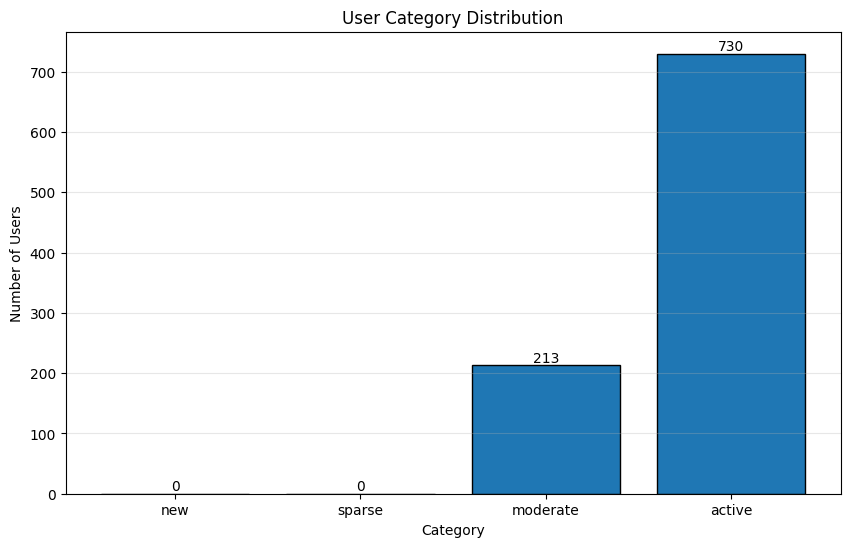

In [18]:
# %% User Category Distribution
print("\n" + "="*60)
print("USER CATEGORY DISTRIBUTION")
print("="*60)

categories = {'new': 0, 'sparse': 0, 'moderate': 0, 'active': 0}
for user_id in users['user_id']:
    category, _ = hybrid_system.get_user_category(user_id)
    categories[category] += 1

print("User Distribution:")
for category, count in categories.items():
    percentage = (count / len(users)) * 100
    print(f"  {category.capitalize()}: {count} users ({percentage:.1f}%)")


# Visualization
plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), categories.values(), edgecolor='black')
plt.title('User Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.3)
for i, (k, v) in enumerate(categories.items()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [19]:
# %% Summary
print("\n" + "="*60)
print("SYSTEM SUMMARY")
print("="*60)

print("""
This hybrid recommendation system implements a sophisticated switching strategy:

1. **Cold Start Users (0 ratings)**:
   - Uses popularity-based recommendations
   - Shows trending and highly-rated movies
   - No personalization required

2. **Sparse Users (1-10 ratings)**:
   - 70% Content-Based: Finds similar movies to what they liked
   - 30% Popularity: Ensures quality recommendations
   - Focuses on content similarity

3. **Moderate Users (11-30 ratings)**:
   - 60% Collaborative Filtering: Leverages similar users
   - 30% Content-Based: Adds content diversity
   - 10% Popularity: Safety net for quality
   - Balanced approach

4. **Active Users (31+ ratings)**:
   - 80% Collaborative Filtering: Strong user-user patterns
   - 20% Content-Based: Adds serendipity
   - Trusts the collaborative model

**Key Improvements Over Original System:**
- ✅ Handles cold start problem
- ✅ Adaptive strategy based on user profile
- ✅ Multiple algorithms working together
- ✅ Better similarity calculations (Pearson correlation)
- ✅ TF-IDF for content analysis (vs simple count)
- ✅ Explainable recommendations
- ✅ Weighted rating system for popularity
- ✅ Confidence-based model selection
""")



SYSTEM SUMMARY

This hybrid recommendation system implements a sophisticated switching strategy:

1. **Cold Start Users (0 ratings)**:
   - Uses popularity-based recommendations
   - Shows trending and highly-rated movies
   - No personalization required

2. **Sparse Users (1-10 ratings)**:
   - 70% Content-Based: Finds similar movies to what they liked
   - 30% Popularity: Ensures quality recommendations
   - Focuses on content similarity

3. **Moderate Users (11-30 ratings)**:
   - 60% Collaborative Filtering: Leverages similar users
   - 30% Content-Based: Adds content diversity
   - 10% Popularity: Safety net for quality
   - Balanced approach

4. **Active Users (31+ ratings)**:
   - 80% Collaborative Filtering: Strong user-user patterns
   - 20% Content-Based: Adds serendipity
   - Trusts the collaborative model

**Key Improvements Over Original System:**
- ✅ Handles cold start problem
- ✅ Adaptive strategy based on user profile
- ✅ Multiple algorithms working together
- ✅ Better

In [20]:
# %% Save Models
print("\n" + "="*60)
print("SAVING MODELS")
print("="*60)

import pickle

# Save individual models
with open('models/popularity_model.pkl', 'wb') as f:
    pickle.dump(hybrid_system.popularity_model, f)
print("✓ Popularity model saved")

with open('models/cf_model.pkl', 'wb') as f:
    pickle.dump(hybrid_system.cf_model, f)
print("✓ Collaborative filtering model saved")

hybrid_system.cb_model.save_model('models/content_model.pkl')
print("✓ Content-based model saved")

# Save hybrid system
with open('models/hybrid_system.pkl', 'wb') as f:
    pickle.dump(hybrid_system, f)
print("✓ Hybrid system saved")

print("\nAll models saved successfully!")
print("Load them later with: pickle.load(open('models/hybrid_system.pkl', 'rb'))")


SAVING MODELS
✓ Popularity model saved
✓ Collaborative filtering model saved
✓ Content-based model saved
✓ Hybrid system saved

All models saved successfully!
Load them later with: pickle.load(open('models/hybrid_system.pkl', 'rb'))
